<div align="center" style="color:Blue;font-size:20px">Clustering Wine Samples using DBSCAN</div>

### Task1 : Generating Data Set

In [1]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#setting random seed as 42
np.random.seed(42)

In [3]:
def pointsincircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-20,20),math.sin(2*math.pi/n*x)*r+np.random.normal(-20,20)) for x in range(1,n+1)]

In [4]:
df=pd.DataFrame(pointsincircum(400,900))

In [5]:
df

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
895,342.340597,-28.868134
896,376.709617,-14.950166
897,384.224942,-40.624259
898,373.609174,-38.713021


In [6]:
df1=pd.DataFrame(pointsincircum(250,600))
df2=pd.DataFrame(pointsincircum(90,200))

In [7]:
a=pd.DataFrame([(np.random.randint(-500,500),np.random.randint(-500,500)) for i in range(300)])


In [8]:
df=pd.concat([df,df1,df2,a])

In [9]:
df.shape

(2000, 2)

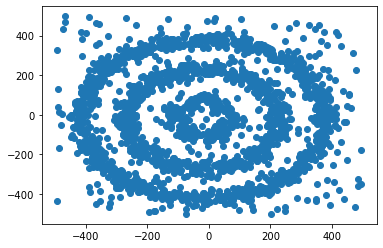

In [10]:
#dataset beofre clustering
plt.scatter(df[0],df[1])

### Task2

##### K Means :

In [11]:
from sklearn.cluster import KMeans

In [12]:
#modelling
model=KMeans().fit(df)

In [13]:
df1=df.copy()
df1["labels"]=model.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

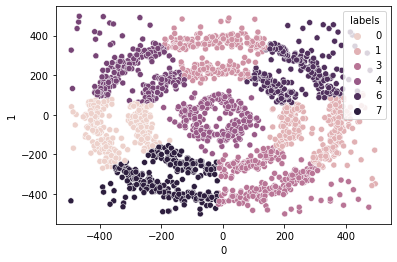

In [14]:
#cluster visualization after k means clustering
sns.scatterplot(data=df1,x=df1[0],y=df1[1],hue="labels")

In [15]:
#here we can see that for k means clustering with default parameters it has not clustered correctly

##### Agglomerative Hierarchical Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
#modelling using Agglomerative Hierarchical Clustering
model2=AgglomerativeClustering().fit(df)

In [18]:
df2=df.copy()
df2["labels"]=model2.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

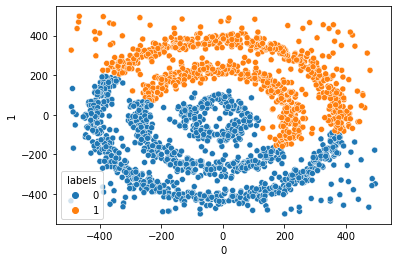

In [19]:
#plotting clusters for Agglomerative Hierarchical Clustering
sns.scatterplot(data=df2,x=df2[0],y=df2[1],hue="labels")

In [20]:
#here we can see that with default parameters  it has clustered into two labels and it has mixed up the all concentric circles 

##### DBSCAN- Default n_samples and eps

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
model3=DBSCAN().fit(df)

In [23]:
df3=df.copy()
df3["labels"]=model3.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

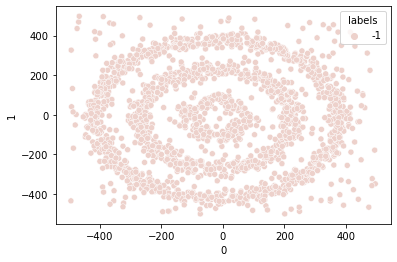

In [24]:
sns.scatterplot(data=df3,x=df3[0],y=df3[1],hue="labels")

### Task3 : Hyperameter Tuning for DBSCAN

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
nn=NearestNeighbors(n_neighbors=2).fit(df)

In [27]:
distances,indices=nn.kneighbors(df)

In [28]:
distances

array([[ 0.        , 11.13684195],
       [ 0.        , 10.33611013],
       [ 0.        ,  2.00730733],
       ...,
       [ 0.        , 15.59837872],
       [ 0.        , 10.72099341],
       [ 0.        , 33.01548877]])

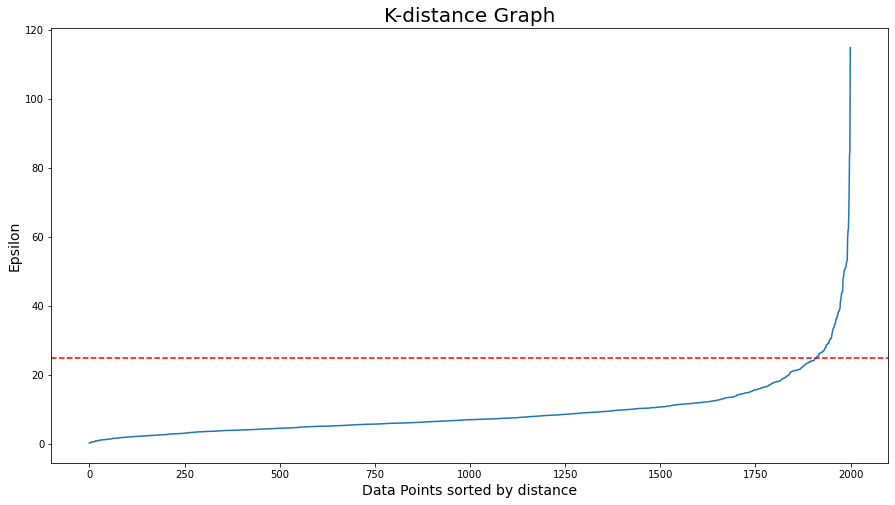

In [29]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=25, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [30]:
#considering epsilon as 25

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette={}
nl={}
for i in range(5,15):
        cluster=DBSCAN(eps=25,min_samples=i).fit(df)
        labels=cluster.labels_
        nl[i]=len(np.unique(labels))
        silhouette[i]=(silhouette_score(df,labels))
        

In [33]:
#silhoutte scores for respective min_samples
silhouette

{5: -0.12827078458853294,
 6: -0.12861900477100288,
 7: -0.1306706709807928,
 8: 0.03269052859563408,
 9: 0.1262266052064126,
 10: 0.1505742196034775,
 11: 0.11198224690266351,
 12: 0.09781379454300144,
 13: 0.0821236504236107,
 14: 0.037161424023595964}

In [34]:
#min samples and their respective clusters
nl

{5: 4, 6: 4, 7: 4, 8: 6, 9: 12, 10: 20, 11: 24, 12: 34, 13: 37, 14: 48}

In [35]:
#keeping silhpoutte score and number of clusters in mind we should have gone for  min_samples as 13
#but to get clusters=3 for this problem we will be considring min_samples as 6. 

### Task4 : Applying DBSCAN with hyperparameters

In [36]:
#building model with epsilon as 25 and min samples as 6 to get clusters as 3
model=DBSCAN(eps=25,min_samples=6).fit(df)

In [37]:
labels=model.labels_

In [38]:
df4=df.copy()
df4["labels"]=labels

<AxesSubplot:xlabel='0', ylabel='1'>

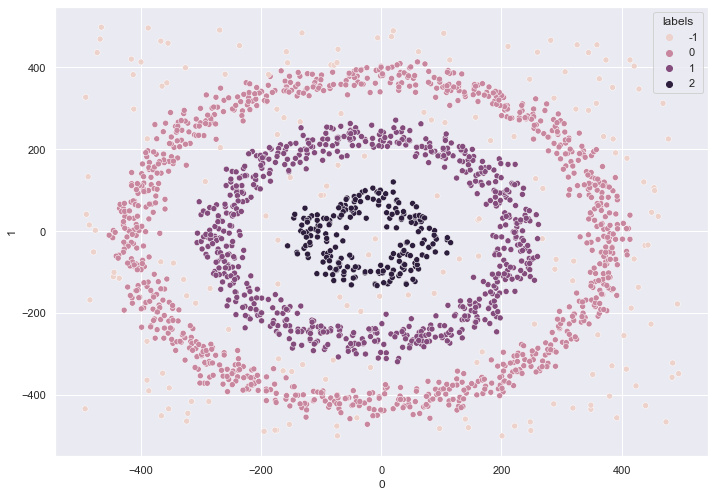

In [39]:
#plotting the clusters 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df4,x=df4[0],y=df4[1],hue="labels")

In [40]:
#silhoutte score 
silhouette_score(df,labels)

-0.12861900477100288

In [41]:
#clusters and their respective frequency of data points
df4["labels"].value_counts()

 0    958
 1    650
 2    212
-1    180
Name: labels, dtype: int64

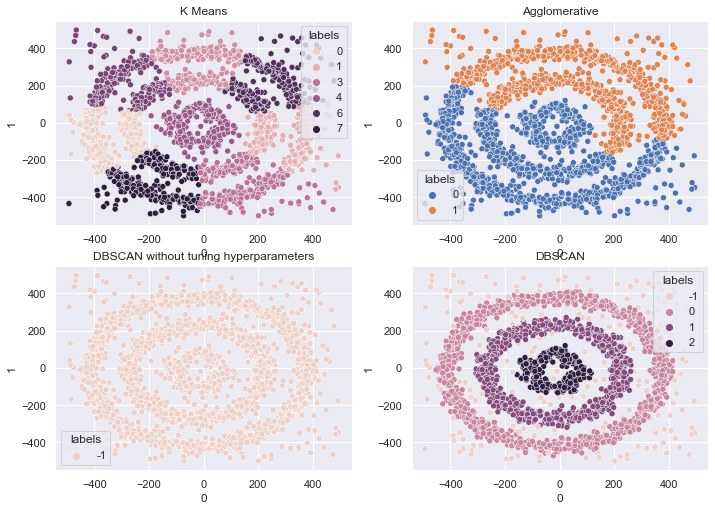

In [42]:
plt.subplot(221)
sns.scatterplot(data=df1,x=df2[0],y=df1[1],hue="labels")
plt.title("K Means")
plt.subplot(222)
sns.scatterplot(data=df2,x=df2[0],y=df2[1],hue="labels")
plt.title("Agglomerative")
plt.subplot(223)
sns.scatterplot(data=df3,x=df3[0],y=df3[1],hue="labels")
plt.title("DBSCAN without tuning hyperparameters")
plt.subplot(224)
sns.scatterplot(data=df4,x=df4[0],y=df4[1],hue="labels")
plt.title("DBSCAN")
plt.show()

In [43]:
#in first graph k means, we can see how clusters are random without considering concentrix circles.same for agglomerative clustering.
#while using dbscan without hyperparameter tuning and using default parameters we dont get any clusters and all are considered as outliers
#and finally using DBSCAN after hyperparameter tuning the epsilon and min_samples we were able to cluster based on concentric circles.But still the silhoutte score is low for this model 
#We can clearly say from this practice that DBSCAN after tuning epsilon and min_samples works well for arbitary shapes unlike kmeans/agglomerative clustering